Информация о столбцах
id
track_name
size_bytes
currency
price
rating_count_tot
rating_count_ver
user_rating
user_rating_ver
ver
cont_rating
prime_genre
sup_devices.num
ipadSc_urls.num
lang.num
vpp_lic

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
# Использую svm, потому что так подсказал cheat sheet на sklearn
from sklearn import svm, preprocessing

df = pd.read_csv('AppleStore.csv', index_col=0)
df.dropna()
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


C:\Users\user.DESKTOP-CKR469D\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


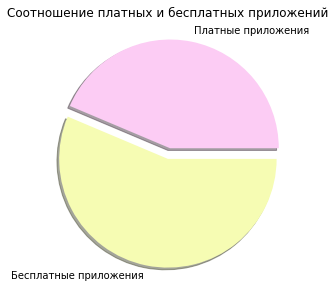

In [87]:
# Соотношение платных и бесплатных игр

fig = plt.figure(figsize=(5, 5))
payment = df[['price']].copy()
paid = payment[payment > 0.0].count()
free = payment[payment == 0.0].count()

PaymentDistr = [paid, free]
plt.title('Соотношение платных и бесплатных приложений')
Pie = plt.pie(PaymentDistr,
              labels=['Платные приложения', 'Бесплатные приложения'],
              shadow=True, colors=['#fcccf4', '#f6fcb3'], explode=(0.1, 0))

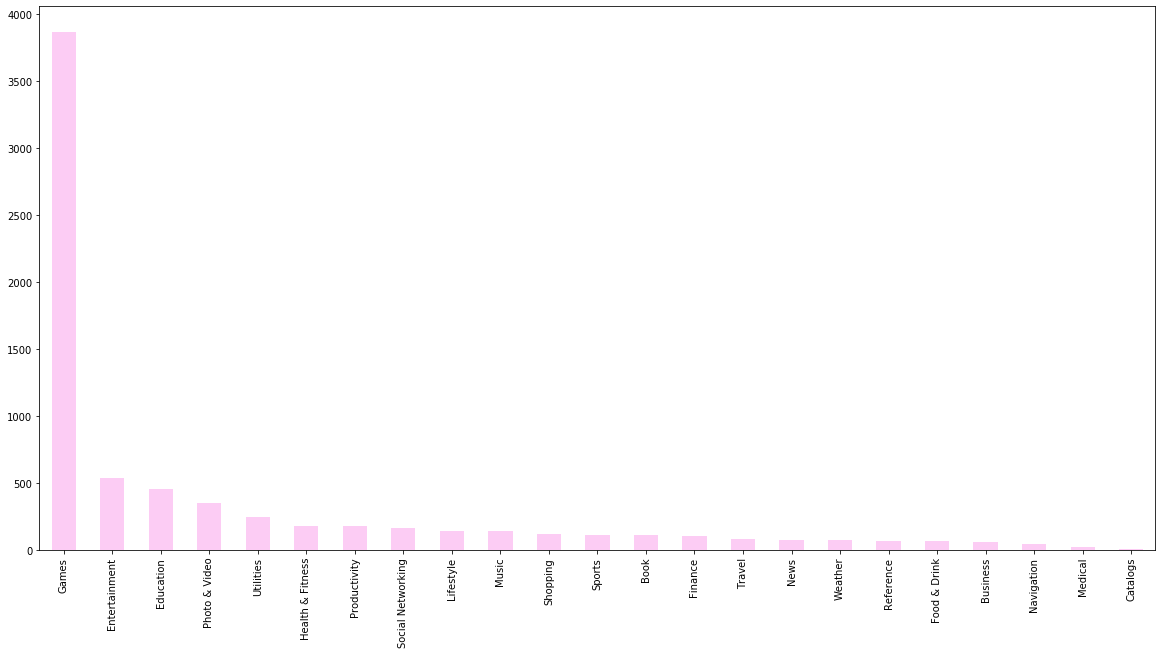

In [88]:
# Посмотрим, какого жанра больше всего
df["prime_genre"].value_counts().plot(kind='bar', figsize=(20, 10),
                                      color=('#fcccf4'))

In [89]:
df['price'] = df['price'].astype("category").cat.codes
df['user_rating'] = df['user_rating'].astype("category").cat.codes
print("Корреляция между ценой и рейтингом = ",
      df['price'].corr(df['user_rating']))

Корреляция между ценой и рейтингом =  0.0792827407119385


<Figure size 1080x576 with 0 Axes>

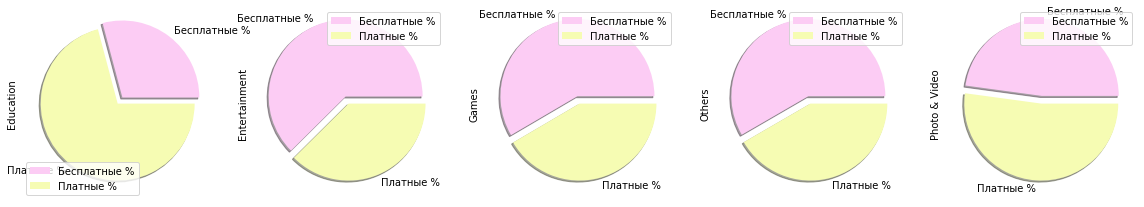

In [90]:
# Отбираем 4 наиболее крупных категории
s = df.prime_genre.value_counts().index[:4]

# Функция для определения строк, не попадащих в 4 наиболее крупные категории


def categ(x):
    if x in s:
        return x
    else:
        return "Others"

# Заменяем названия всех категорий, кроме 4-х наиболее крупных, на "others"

df['Genres'] = df.prime_genre.apply(lambda x: categ(x))
# Считаем кол-во бесплатных для каждого жанра
free = df[df.price == 0].Genres.value_counts().sort_index().to_frame()
# Считаем кол-во платных для каждого жанра
paid = df[df.price > 0].Genres.value_counts().sort_index().to_frame()
# Создаем колонку для бесплатных
free.columns = ['free']
# Создаем колонку для платных
paid.columns = ['paid']
# .join(paid) Создаем таблицу
dist = free.join(paid)
# Задаем данные для диаграммы
pies = dist[['free', 'paid']]
pies.columns = ['Бесплатные %', 'Платные %']
plt.figure(figsize=(15, 8))
pies.T.plot.pie(subplots=True, figsize=(20, 4),
                colors=['#fcccf4', '#f6fcb3'], shadow=True, explode=(0.1, 0))
plt.show()

<Figure size 720x720 with 0 Axes>

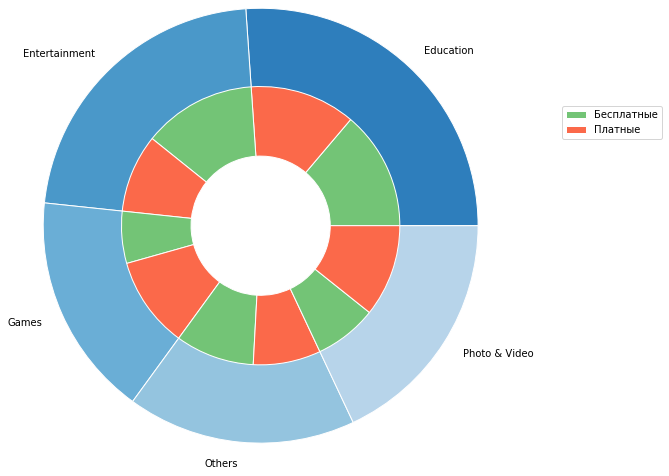

In [126]:
plt.figure(figsize=(10, 10))

titles = ['Бесплатные', 'Платные']
subgroup_names = 5*titles
subgroup_size = np.random.uniform(10, 30, len(subgroup_names))
group_names = df.Genres.value_counts().sort_index().index
group_size = subgroup_size.reshape(5, 2).sum(axis=1)

a, b, c = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# Внешнее кольцо
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names,
                  labeldistance=1.1,
                  colors=[a(0.7), a(0.6), a(0.5), a(0.4), a(0.3)])
plt.setp(mypie, width=1, edgecolor='white')

# Внутреннее кольцо. Применяя белый цвет, убираю надписи с внутреннего круга.
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names,
                   labeldistance=0, colors=[c(0.5), b(0.5)],
                   textprops={'color': "w"})
plt.setp(mypie2, width=0.8, edgecolor='white')
plt.margins(0, 0)

# .get_legend_handles_labels() позволяет выбрать данные для легенды
handles, labels = plt.gca().get_legend_handles_labels()
labels_to_skip = len(group_names)
plt.legend(handles[labels_to_skip:labels_to_skip + 2],
           labels[labels_to_skip:labels_to_skip + 2],
           loc=(1.4, 0.9))

plt.show()

In [135]:
sr = pd.Series(df["user_rating"])
print("Стандартное отклонение в рейтинге = ", sr.std())
print("Среднее значение рейтинга = ", sr.mean())

Стандартное отклонение в рейтинге =  2.740033187656788
Среднее значение рейтинга =  6.182992913714047


In [ ]:
# Переводим str в integer для классификатора
df["prime_genre"] = df["prime_genre"].astype("category").cat.codes
df["cont_rating"] = df["cont_rating"].astype("category").cat.codes

# Удаляем незначимые столбцы
df_train = df.drop(['id', 'track_name', 'currency', 'ver'], axis=1)
# Чтобы порядок, заданный в изначальном файле,
# не повлиял на МЛ, нужно "перемешать" его
df_train = sklearn.utils.shuffle(df_train)

X = df_train.drop("user_rating", axis=1).values
# Нормализация data для упрощения работы МЛ
X = preprocessing.scale(X)
y = df_train['user_rating'].values

test_size = 300

X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

model = svm.SVR(kernel="linear")
model.fit(X_train, y_train)

In [ ]:
# Проверка качества
model.score(X_test, y_test)
# Можно посмотреть, насколько качественно работает классификатор
for X, y in zip(X_test, y_test):
    print(f"Model: {model.predict([X])[0]}, Actual: {y}")